In [1]:
# Mit setwd setzt ihr in R euer "working directory"
setwd("~/Documents/praxiskurs_fss21/")

In [2]:
# Daten werden eingelesen mit der Funktion read.csv bzw read.csv2
df_covid <- read.csv("data/RKI_COVID19.csv")

In [3]:
dates <- unique(df_covid$Meldedatum)
cases_per_day  <- sapply(dates, function(date) sum(df_covid$AnzahlFall[df_covid$Meldedatum == date])  )
str(cases_per_day)

 int [1:433] 2733 19858 19348 22306 15096 29787 27995 24545 16661 13410 ...


In [4]:
# Wir speichern die Daten im richten Format und erstellen einen data frame dafür
dates <- as.Date(dates, format="%Y/%m/%d")
df_cases_per_day <- data.frame(dates=dates,cases=cases_per_day)
df_cases_per_day <- df_cases_per_day[order(df_cases_per_day$dates),]
head(df_cases_per_day)

,dates,cases
,<date>,<int>
419,2020-01-07,1
431,2020-01-19,1
430,2020-01-23,1
417,2020-01-25,1
428,2020-01-28,2
424,2020-01-29,2


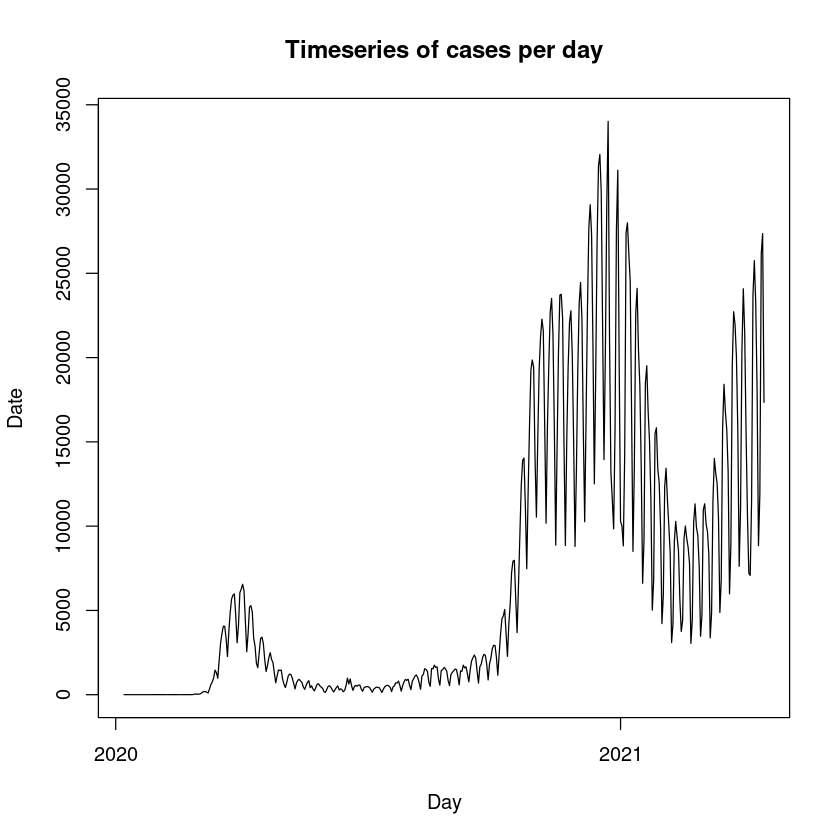

In [5]:
plot(df_cases_per_day$dates,df_cases_per_day$cases, 
     type="l", xlab="Day", ylab="Date", main="Timeseries of cases per day")

In [6]:
# Mit dem POSIX Format lassen sich auch einfach Informationen aus Datumsangaben extrahieren, 
# beispielsweise den Wochentag
df_cases_per_day$wday  <- weekdays(df_cases_per_day$dates)

In [7]:
# Damit können wir uns auch die Gesamtanzahl an Fällen pro Wochentag anschauen
wdays <- c("Montag","Dienstag","Mittwoch","Donnerstag","Freitag","Samstag","Sonntag")
cases_per_wday <-  sapply(wdays, function(wday) sum(df_cases_per_day$cases[df_cases_per_day$wday ==wday] ))
print(cases_per_wday)

    Montag   Dienstag   Mittwoch Donnerstag    Freitag    Samstag    Sonntag 
    325456     527122     609166     562790     490090     370420     213817 


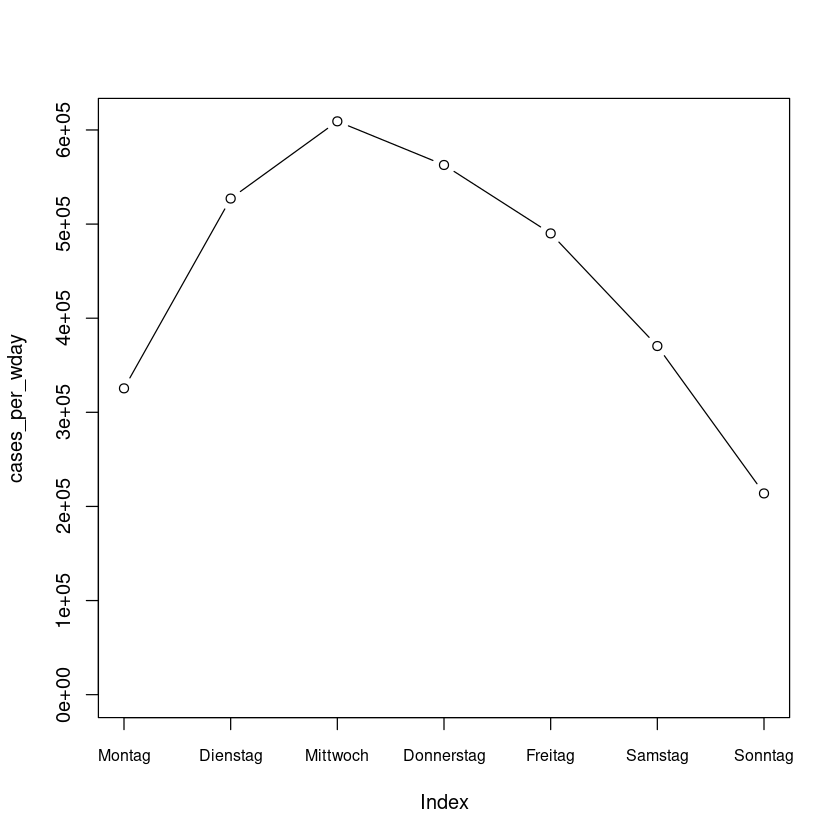

In [8]:
# ... und wieder verschönern
plot(cases_per_wday, type="b", xaxt="n", ylim =c(0,max(cases_per_wday)))
axis(1,at = 1:7,labels = wdays,cex.axis=0.8)

In [9]:
ticks  <- seq(df_cases_per_day$dates[1],df_cases_per_day$dates[length(dates)], by="month")
ticks

[1] "2020-01-07" "2020-02-07" "2020-03-07" "2020-04-07" "2020-05-07"
 [6] "2020-06-07" "2020-07-07" "2020-08-07" "2020-09-07" "2020-10-07"
[11] "2020-11-07" "2020-12-07" "2021-01-07" "2021-02-07" "2021-03-07"
[16] "2021-04-07"

## Aufgabe 
* Berechnet mit einer for-Schleife den laufenden zentrierten siebentägigen Mittelwert definiert als 

\\[ \overline{x}_i = \frac{1}{7} \sum_{j=i-3}^{i+3}x_j, \quad i= 4,...,n-3.  \\]
* Macht euch mit der Funktion runmean aus dem Paket catools bekannt.
* Berechnet den zentrierten siebentägigen Mittelwert mithilfe von runmean
* Erstellt einen Plot für diesen Mittelwert
* Stellt mit unterschiedlichen Farben sowohl normale Daten als auch den Mittelwert im selben Plot dar

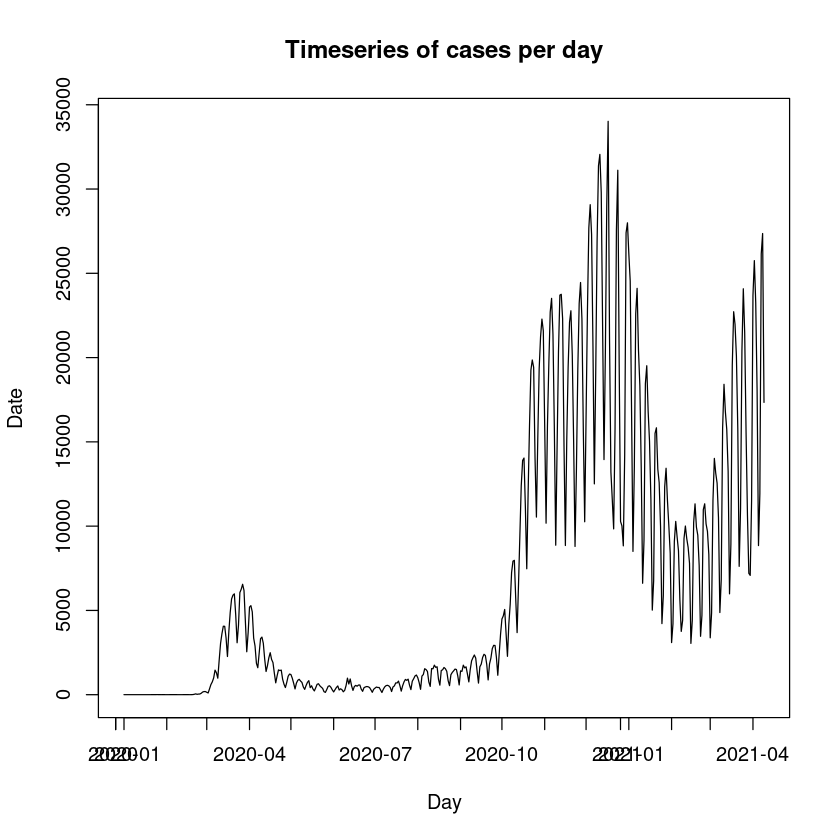

In [10]:
plot(as.POSIXct(df_cases_per_day$dates),df_cases_per_day$cases, 
     type="l", xlab="Day", ylab="Date", main="Timeseries of cases per day")
axis.POSIXct(1,at=ticks,format="%Y-%m")

In [11]:
days <- seq(min(df_cases_per_day$dates),max(df_cases_per_day$dates),by="day")

## Sehr hilfreich in vielen Situationen: die %in% Funktion
Prüft ob erster Operaden Element der Menge ist, die als zweiter Operand übergeben wird.

Beispielsweise

"Apfel" %in% c("Apfel","Birne","Traube")

gibt TRUE zurück.

In [12]:
head(days %in% df_cases_per_day$dates)

[1]  TRUE FALSE FALSE FALSE FALSE FALSE

In [13]:
df_missing_days <- data.frame(dates = days[! as.Date(days) %in% as.Date(df_cases_per_day$dates)], cases = 0)
df_missing_days$wday <- weekdays(df_missing_days$dates)
head(df_missing_days)

,dates,cases,wday
,<date>,<dbl>,<chr>
1,2020-01-08,0,Mittwoch
2,2020-01-09,0,Donnerstag
3,2020-01-10,0,Freitag
4,2020-01-11,0,Samstag
5,2020-01-12,0,Sonntag
6,2020-01-13,0,Montag


In [14]:
df_cases_per_day  <- rbind(df_cases_per_day, df_missing_days)
df_cases_per_day <- df_cases_per_day[order(df_cases_per_day$dates),]
head(df_cases_per_day)

,dates,cases,wday
,<date>,<dbl>,<chr>
419,2020-01-07,1,Dienstag
1100,2020-01-08,0,Mittwoch
2100,2020-01-09,0,Donnerstag
3100,2020-01-10,0,Freitag
434,2020-01-11,0,Samstag
510,2020-01-12,0,Sonntag


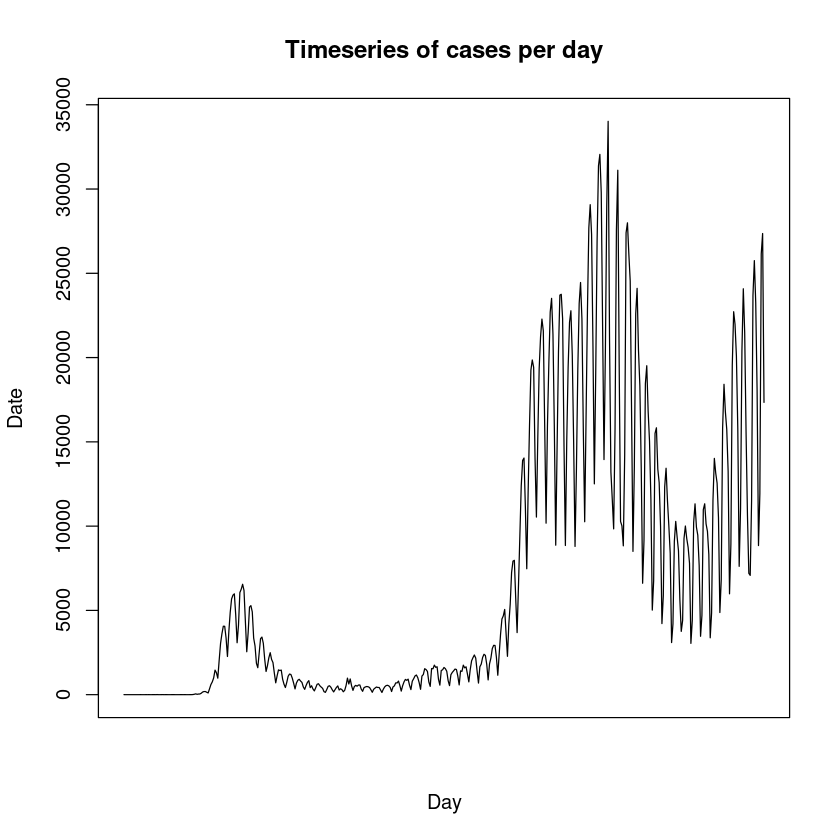

In [15]:
plot(df_cases_per_day[,c("dates","cases")], 
     type="l", xlab="Day", ylab="Date", main="Timeseries of cases per day",xaxt="n")
axis.POSIXct(1,at=ticks,format="%Y-%m")

# ggplot
Die in R implementierten Plot-Funktionen sind hilfreich, um schnell eine Übersicht über Daten zu bekommen. Sie liefern exakt die Darstellung des Inputs, aber Verschönerungen sind kompliziert. 

Deswegen ist der de-facto Standard für Datenvisualisierungen in R das Paket ggplot2. Die dazugehörige Syntax ist etwas anders, aber mit etwas Übung lassen sich aussagekräftige Plots um einiges schneller erstellen. 

Die Funktion ggplot nimmt als Input **immer** einen Dataframe. Erst mit der Funktion aes wird festgelegt, welche Spalten geplottet werden sollen.

Die genaue Methode (Linienplot, Scatterplot, Histogramm, etc.) wird per Addition mitgeteilt. 

In [16]:
library(ggplot2)

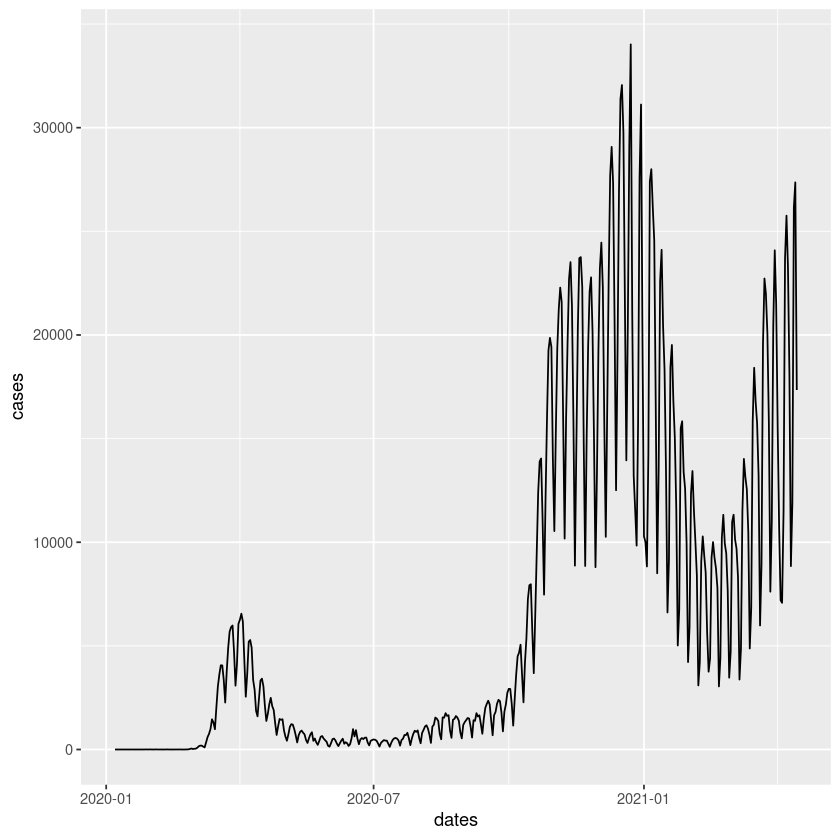

In [17]:
ggplot(df_cases_per_day, aes(x = dates, y=cases)) + geom_path()

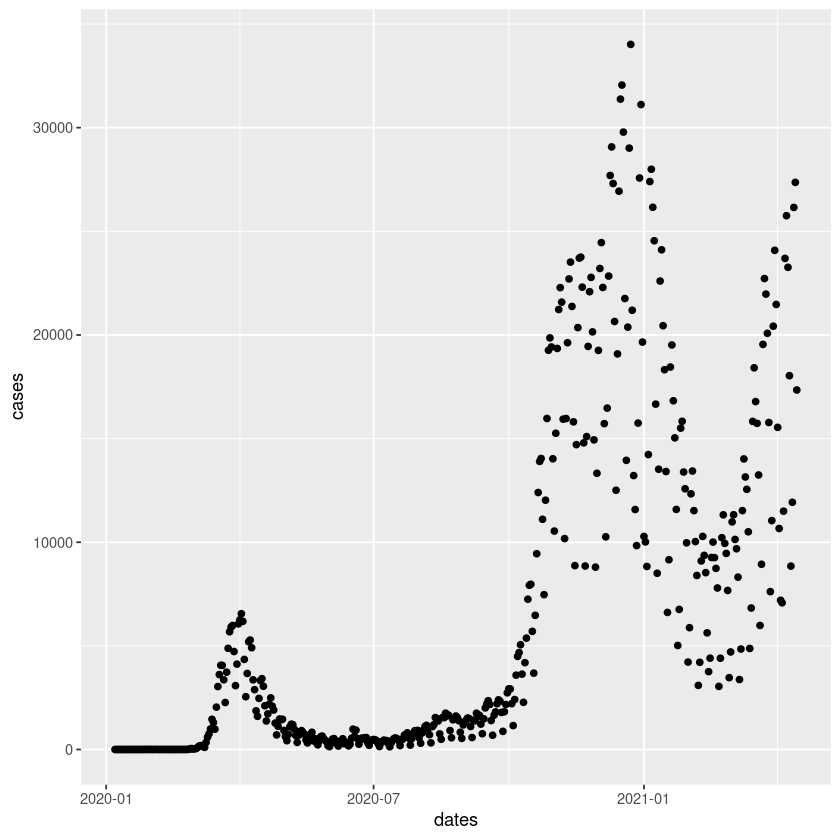

In [18]:
df_cases_per_day$runmean <- caTools::runmean(df_cases_per_day$cases,k=7,align="center")
ggplot(df_cases_per_day) + geom_point(aes(x = dates, y=cases))

ggplots können einer Variable zugewiesen werden und sukzessive aufgebaut werden.

In [19]:
p <- ggplot(df_cases_per_day)

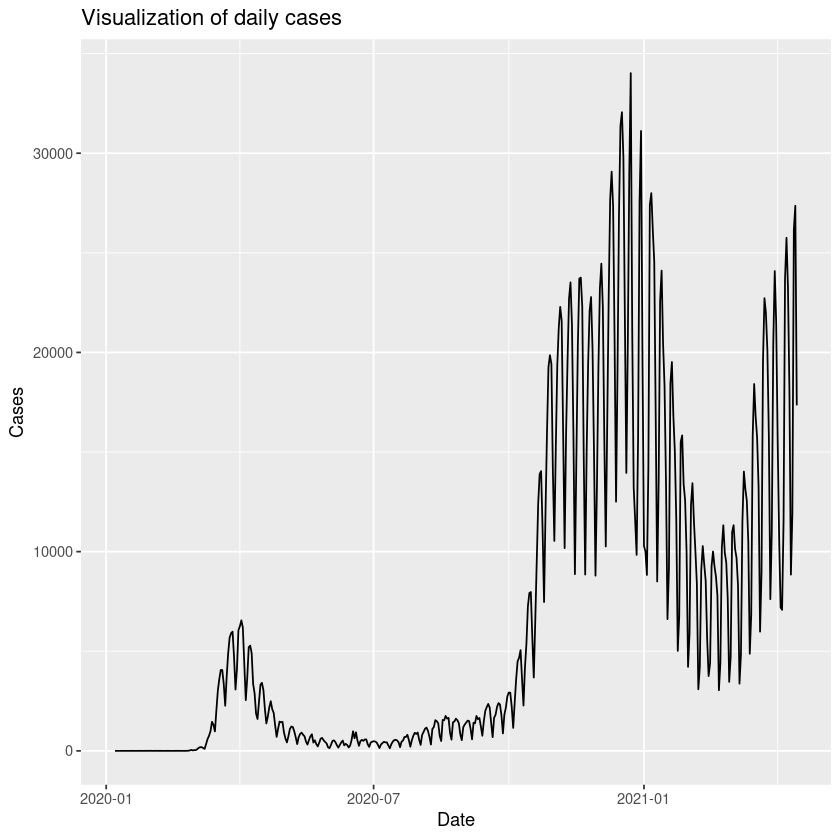

In [20]:
p <- p + geom_path(aes(x = dates, y=cases)) + labs(title="Visualization of daily cases", x="Date", y="Cases")
p

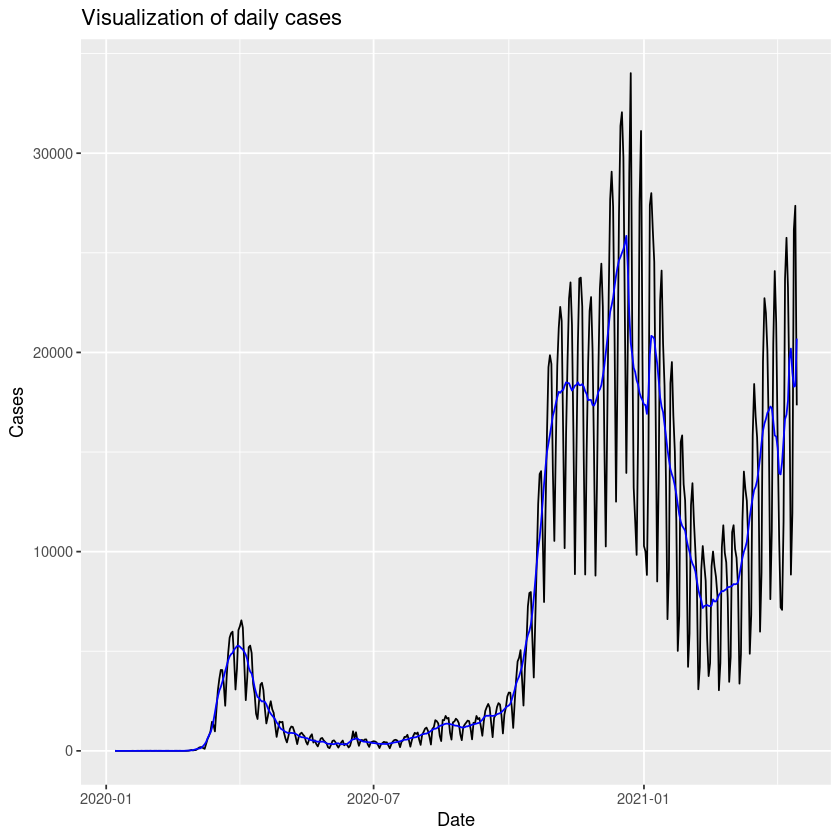

In [21]:
p + geom_path(aes(x = dates, y=runmean),colour="blue")

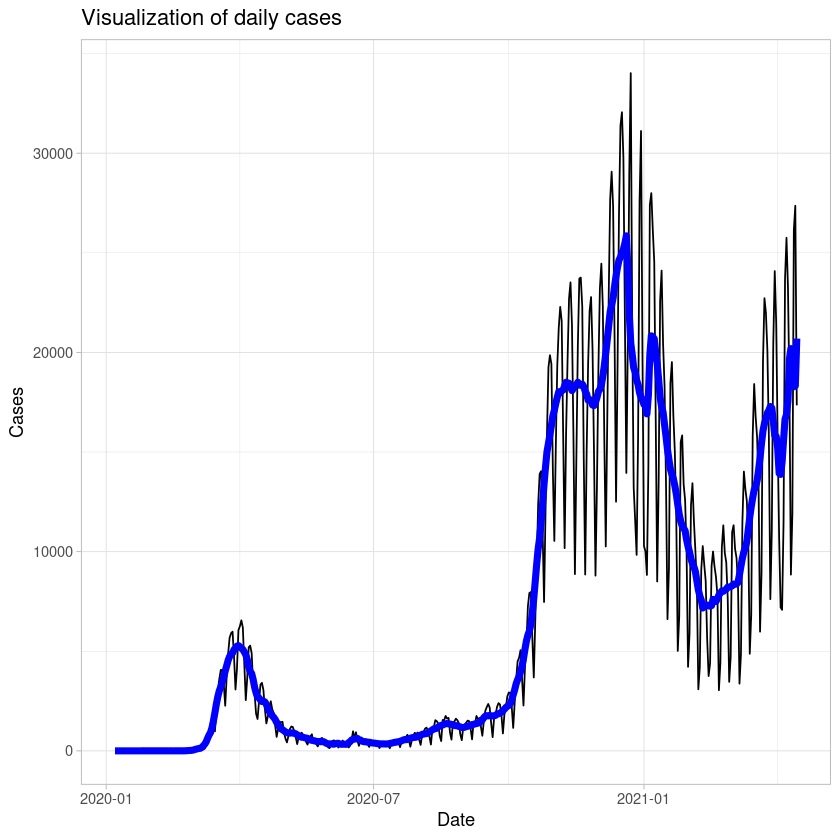

In [22]:
p <- p + geom_path(aes(x = dates, y=runmean),colour="blue",size=2) + theme_light() 
p

Für die Veränderung von Achsen gibt es die scale_ Funktionen, beispielsweise scale_x_date

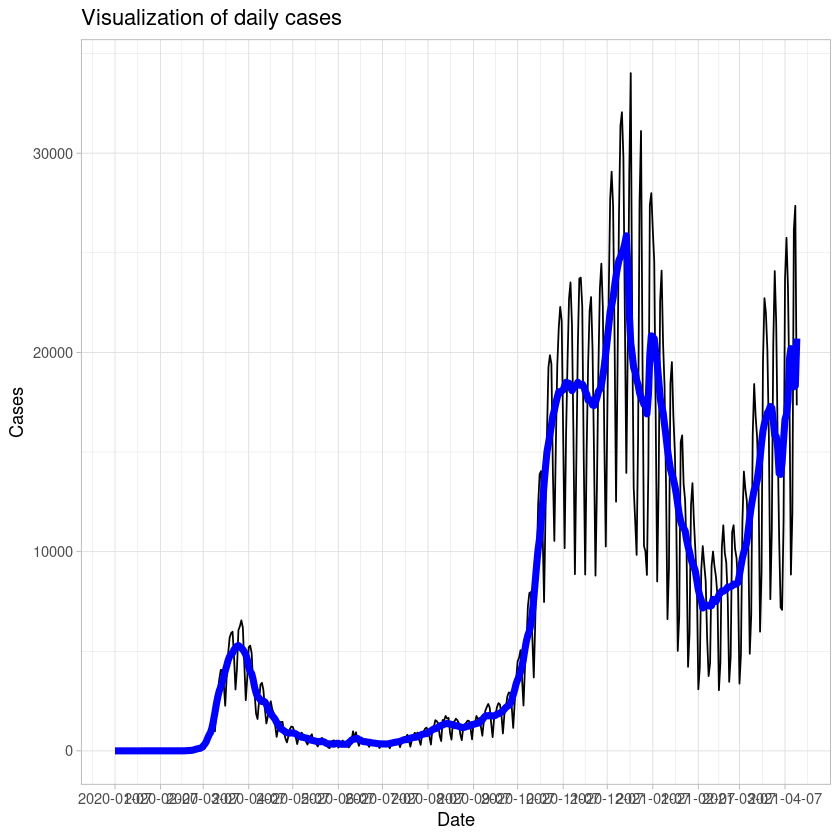

In [23]:
p + scale_x_date(breaks=ticks)

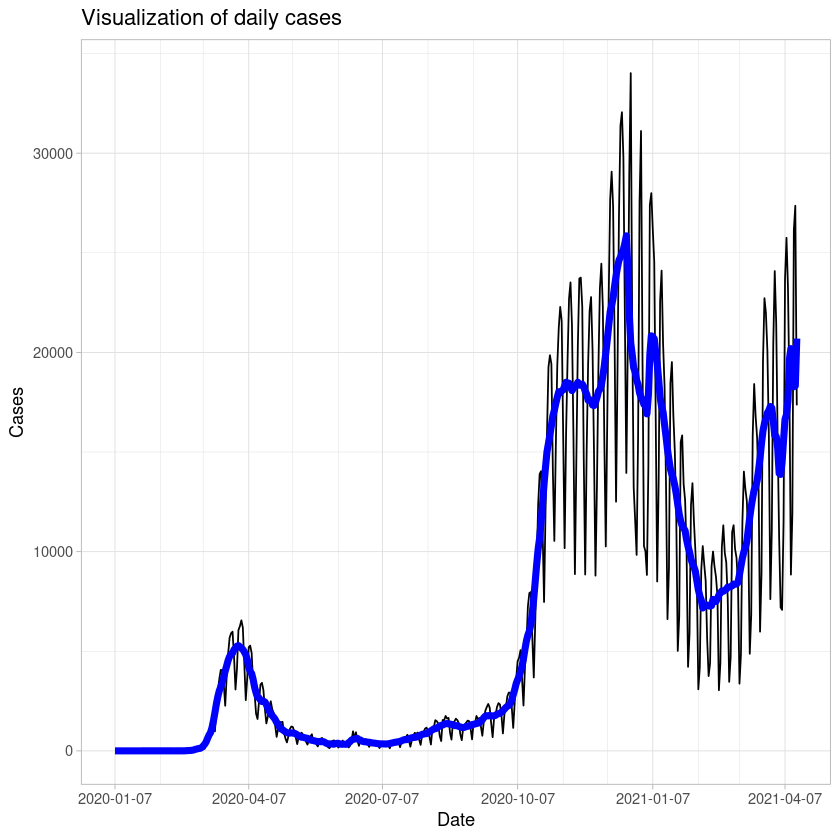

In [24]:
p <- p + scale_x_date(breaks= seq(as.Date("2020-01-07"), as.Date("2021-05-01"), by = "3 months"),
                minor_breaks = ticks)
p

Für das Paket existiert ein Cheatsheet, das die wichtigsten Funktionalitäten darstellt:
https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf
Ihr findet es auch bei Rstudio im Menü "Help"-"Cheatsheets"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



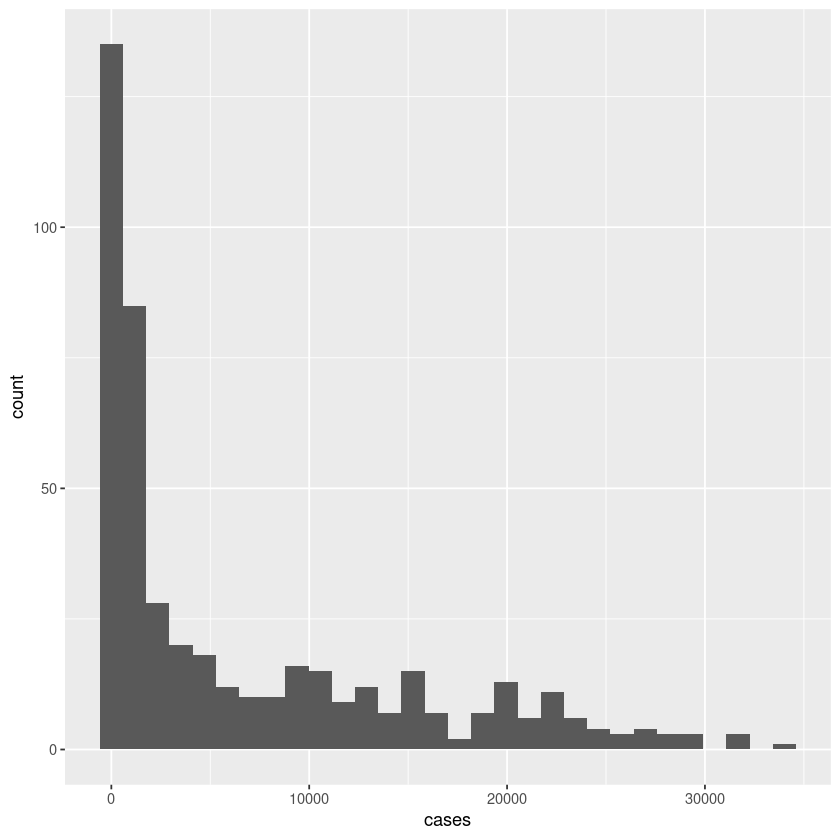

In [25]:
ggplot(df_cases_per_day)+ geom_histogram(aes(x=cases))

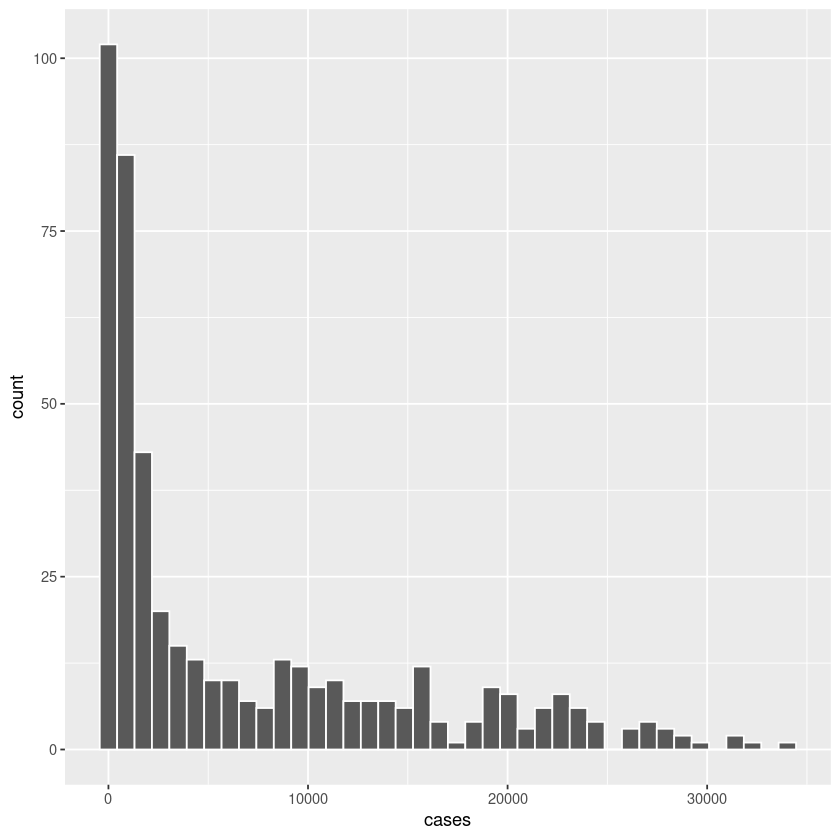

In [26]:
ggplot(df_cases_per_day)+ geom_histogram(aes(x=cases),bins=40, color="white")

In [30]:
df_cases_per_state <- data.frame()
for(land in unique(df_covid$Bundesland) ){
    df_temp <- data.frame(date = unique(df_covid$Meldedatum), bundesland = land)
    df_temp$cases  <- sapply(unique(df_covid$Meldedatum), function(date)
        sum(df_covid$AnzahlFall[df_covid$Meldedatum==date & df_covid$Bundesland == land]))
    df_cases_per_state <- rbind(df_cases_per_state, df_temp)
}

In [34]:
head(df_cases_per_state)

,date,bundesland,cases
,<fct>,<fct>,<int>
1,2020/09/30 00:00:00,Schleswig-Holstein,44
2,2020/10/29 00:00:00,Schleswig-Holstein,251
3,2020/11/03 00:00:00,Schleswig-Holstein,219
4,2020/11/20 00:00:00,Schleswig-Holstein,269
5,2020/11/23 00:00:00,Schleswig-Holstein,151
6,2020/12/18 00:00:00,Schleswig-Holstein,549


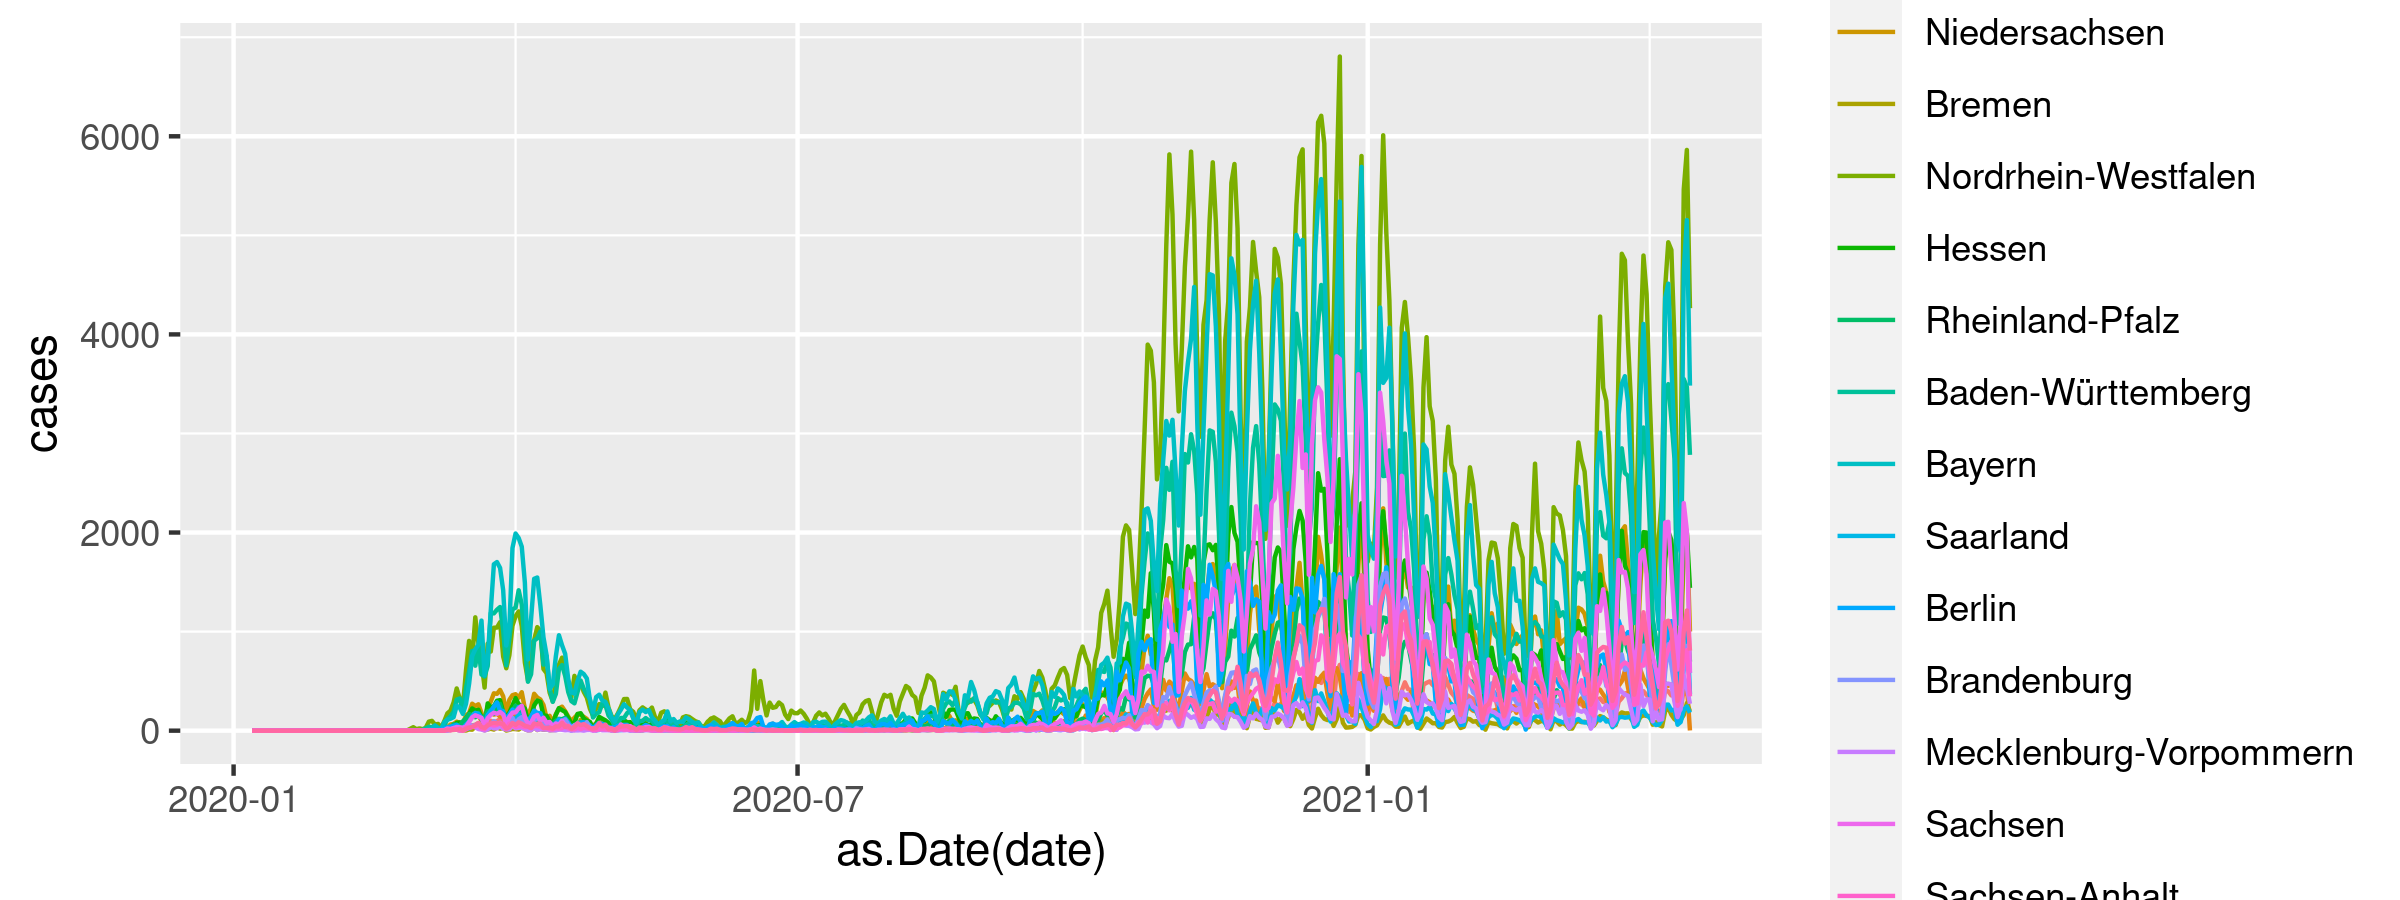

In [32]:
options(repr.plot.width=8, repr.plot.height=3,repr.plot.res = 300)
ggplot(df_cases_per_state)+geom_line(aes(x=as.Date(date), y= cases, color= bundesland))

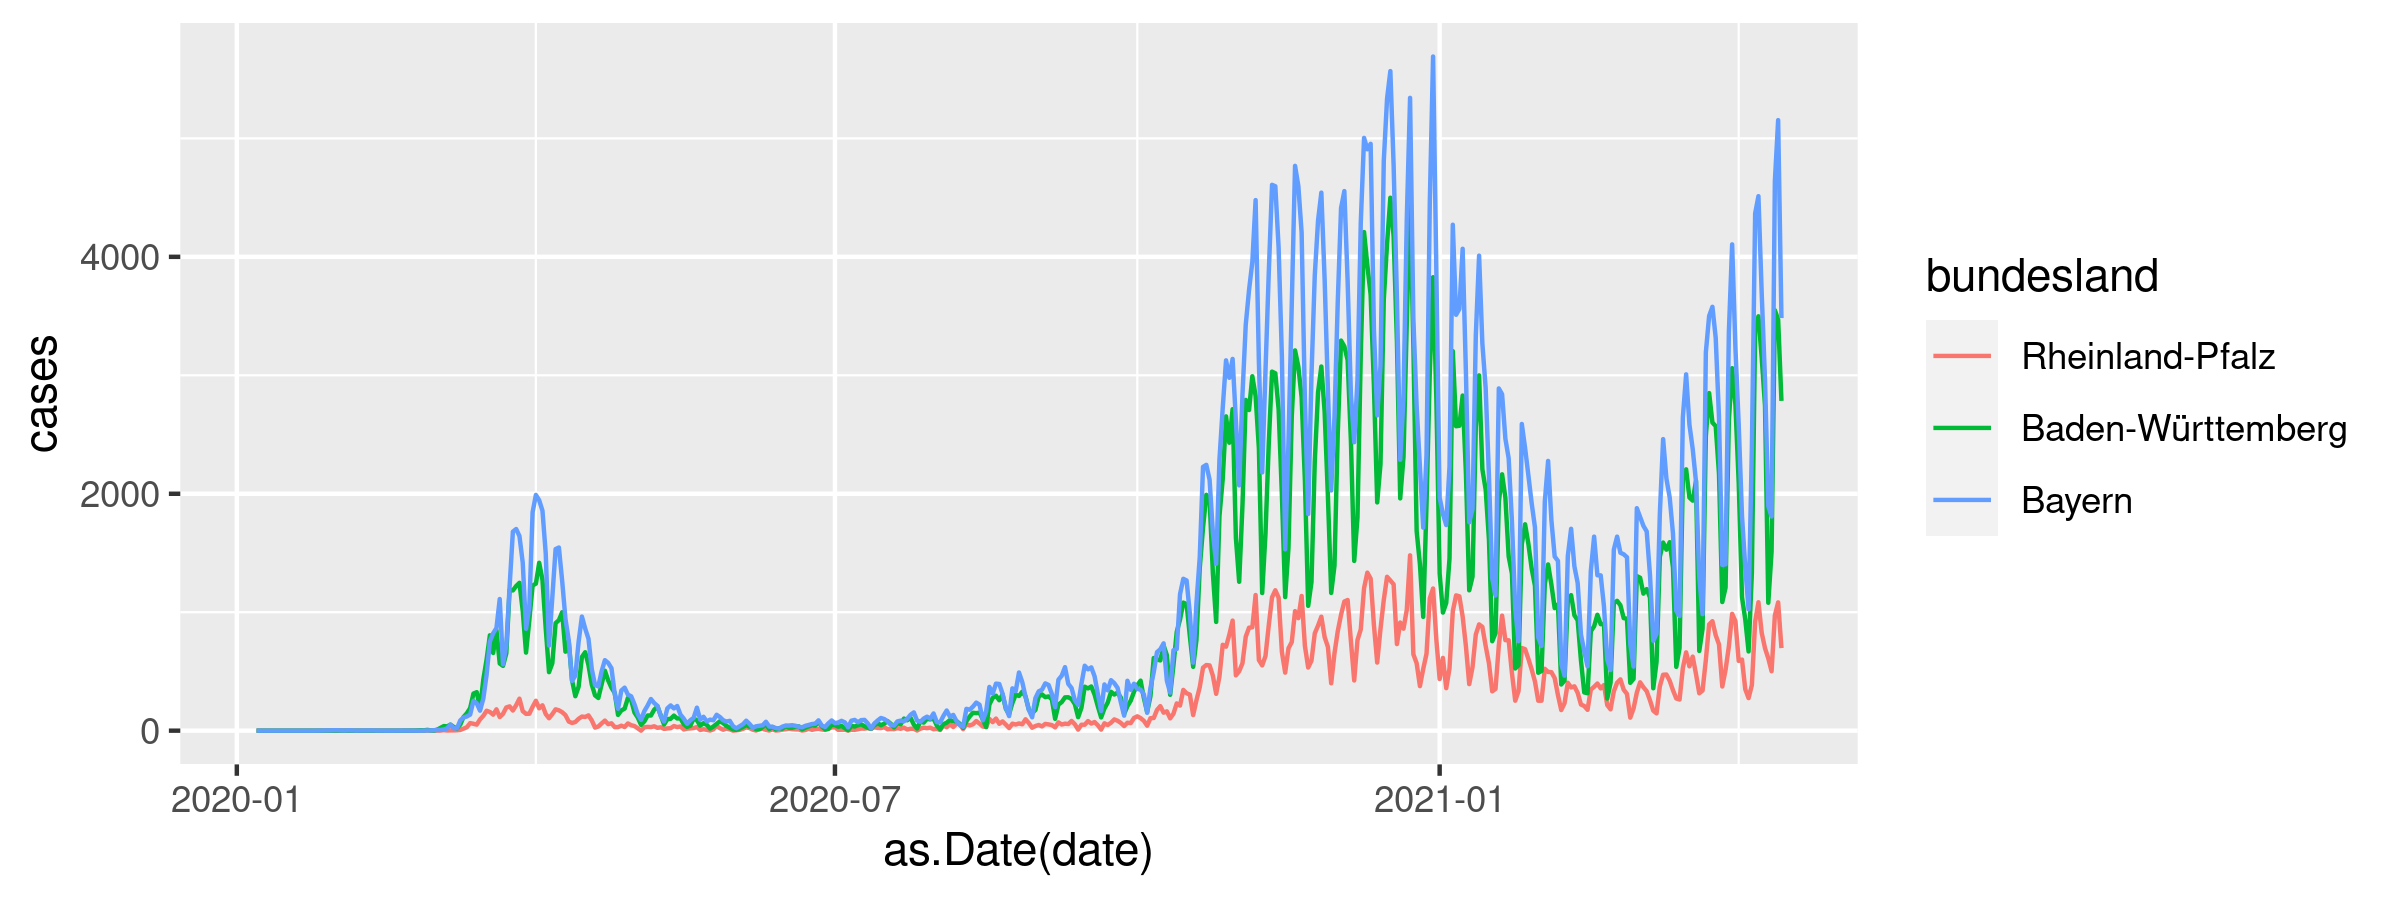

In [33]:
laender <- c("Bayern","Baden-Württemberg","Rheinland-Pfalz")
ggplot(df_cases_per_state[df_cases_per_state$bundesland %in% laender,])+
    geom_line(aes(x=as.Date(date), y= cases, color= bundesland))

# Aufgabe
* Berechnet für den Zeitraum zusätzlich die täglich übermittelten Todeszahlen.
* Stellt die Zahlen zusammen mit ihrem 7-Tages-Mittel in einer Graphik dar.
* Erstellt einen Plot, der sowohl die Infektionen als auch die Todeszahlen beinhaltet.
* Berechnet für jede Altersgruppe im Datensatz die Anzahl an Infektionen pro Tag und erstellt einen Plot für diese Zeitreihe. Erstellt aussagekräftige Beschriftungen für den Plot.


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


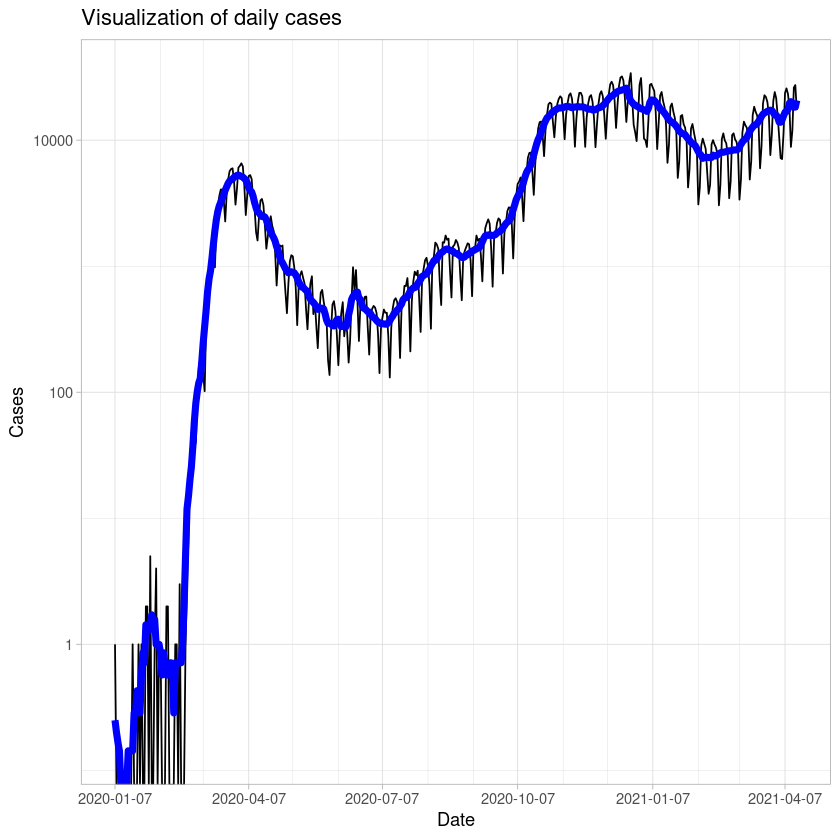

In [27]:
p+ scale_y_log10()

Das Thema "Exponentielles Wachstum" war im letzten Jahr zentral für viele politische Diskussionen. Von exponentiellen Wachstum wird gesprochen, wenn sich die Fallzahlen für ein $a >0$ in etwa so verhalten wie
\\[ y = e^{a*t},\\]
wobei $t$ der Zeitforschritt ist.
* Schätzt anhand der Plots Start- und Endzeitpunkte für die erste und zweite Welle.
* Schätzt mithilfe der Daten jeweils den Parameter $a$ für die festgelegten Zeiträume der ersten und zweite Welle.